# Steatosis v.s. features

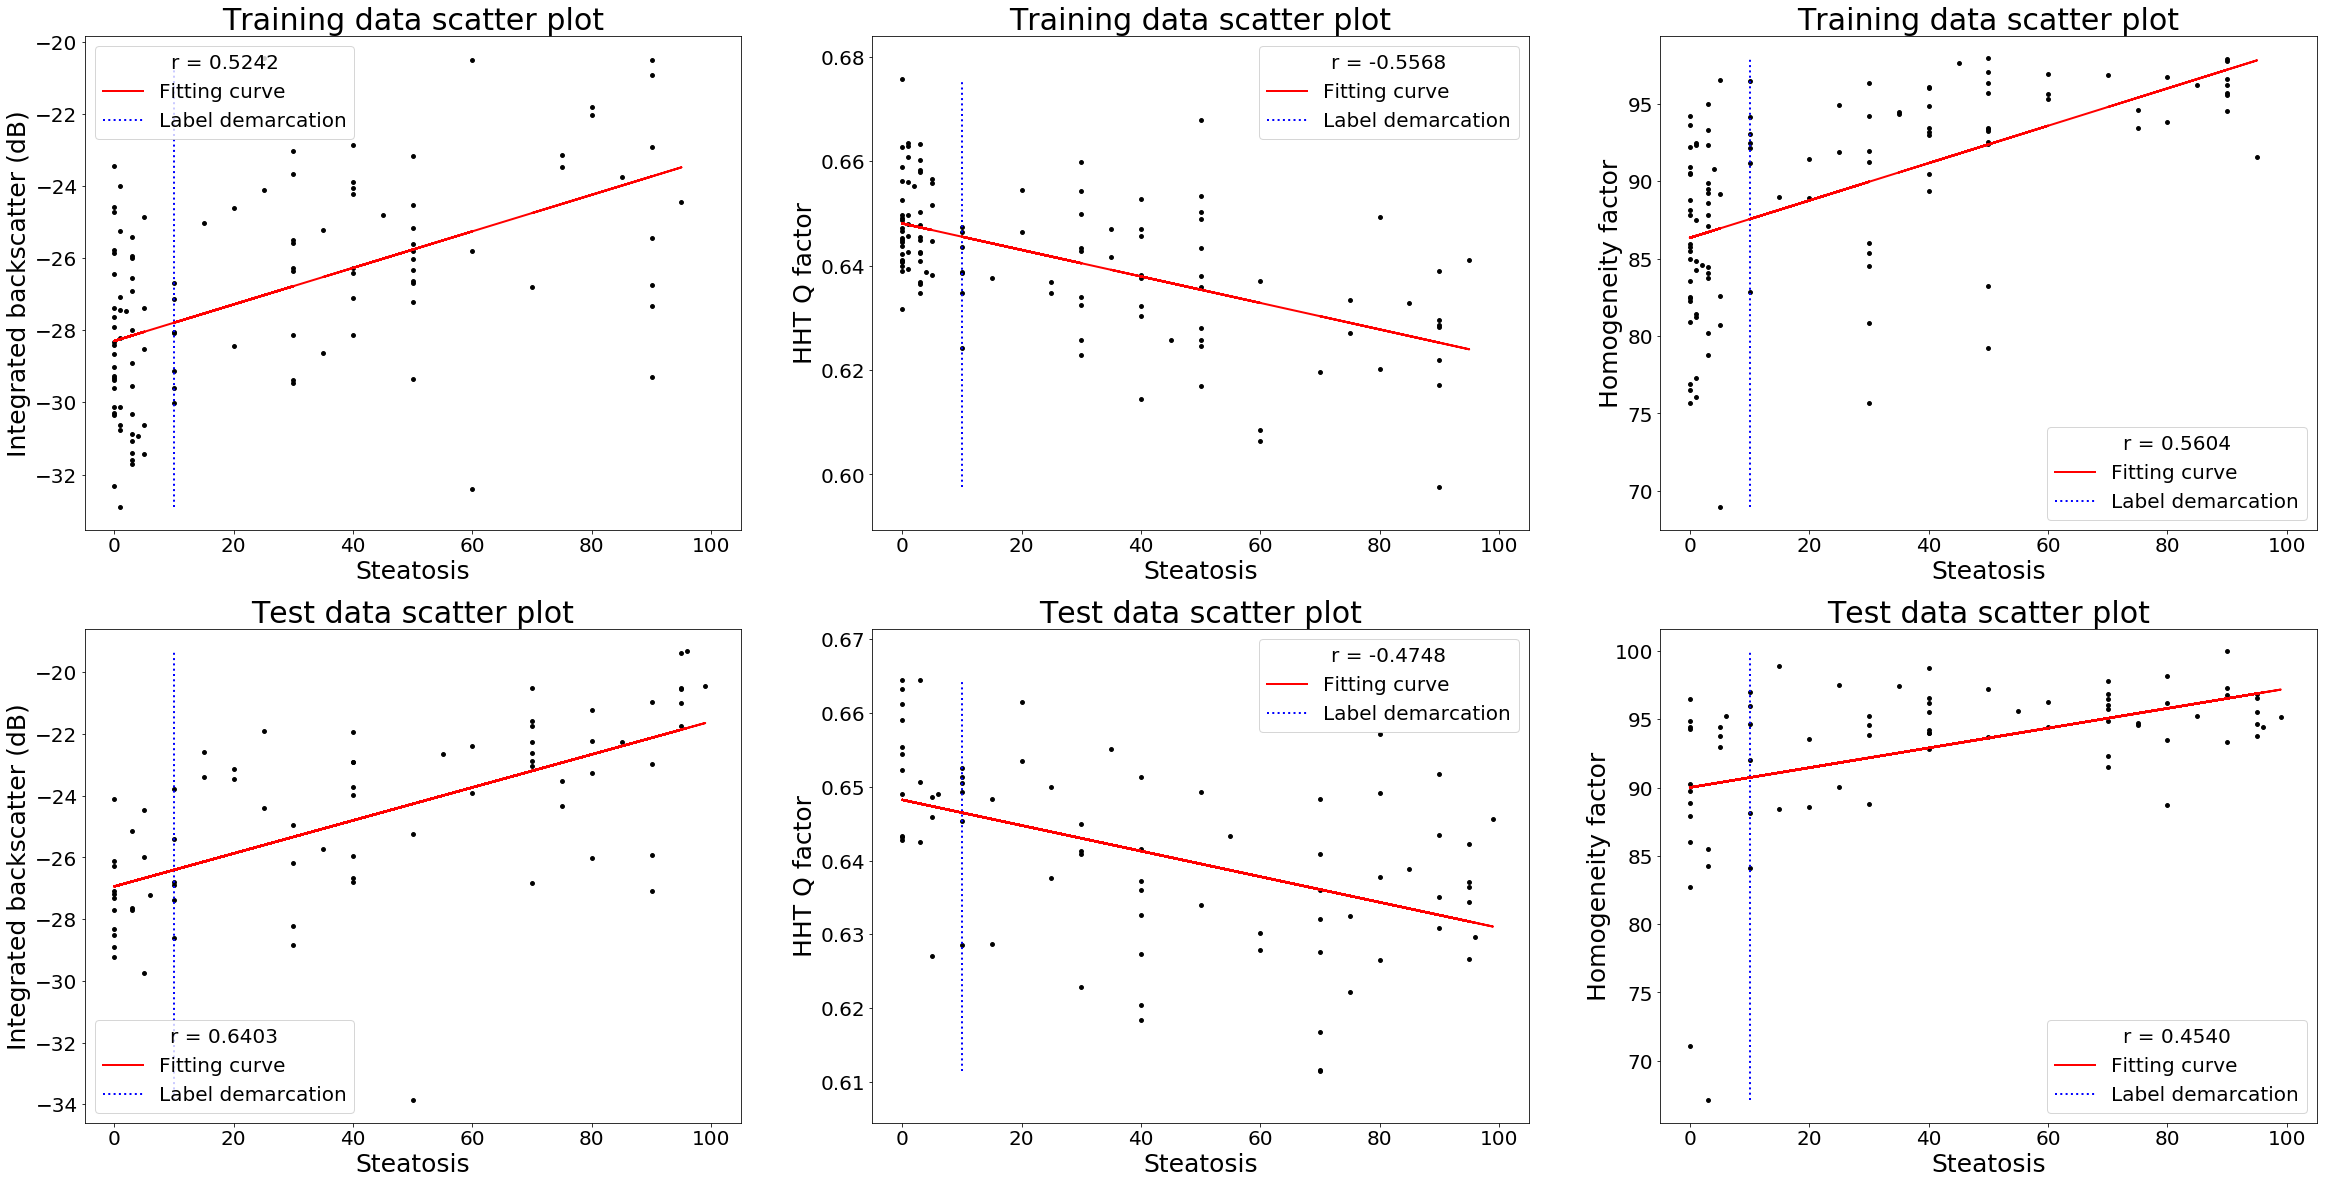

In [70]:
# Scatter & Trend-line & Correlation Coefficient plot

# import models
import matplotlib.pyplot as plt
import numpy as np
import xlrd
from sklearn.preprocessing import MinMaxScaler

# load data
## Pathology for train
data = xlrd.open_workbook("Pathology.xlsx").sheets()[0]

X_train = data.col_values(1)  # X = Pathology

y_train = np.zeros((111, 3))
y_train[:, 0] = data.col_values(3)  # y0 = Integrated backscatter
y_train[:, 1] = data.col_values(4)  # y1 = Q factor (HHT)
y_train[:, 2] = data.col_values(6)  # y2 = Homogeneity factor

## New Pathology for test
data = xlrd.open_workbook("NPathology.xlsx").sheets()[0]

X_test = data.col_values(1)   # X = NPathology

y_test = np.zeros((74, 3))
y_test[:, 0] = data.col_values(3)  # y0 = Integrated backscatter
y_test[:, 1] = data.col_values(4)  # y1 = Q factor (HHT)
y_test[:, 2] = data.col_values(6)  # y2 = Homogeneity factor

features = ['Integrated backscatter (dB)', 'HHT Q factor', 'Homogeneity factor']

# correlation coefficient
R = list(np.corrcoef(X_train, y_train[:, i])[1,0] for i in range (3))
S = list(np.corrcoef(X_test, y_test[:, i])[1,0] for i in range (3))

# plot
plt.figure(figsize = (40, 20))

for i in range(3):
    plt.subplot(2, 3, 1+i)
    plt.scatter(X_train, y_train[:, i], s = 15, c = 'black', alpha = 1)
    plt.title('Training data scatter plot', size=30)
    plt.xlabel('Steatosis', size = 25)
    plt.ylabel('{0}'.format(features[i]), size = 25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.xlim(-5, 105)
    plt.vlines(10, min(y_train[:, i]), max(y_train[:, i]), linestyle=':', linewidth=2, color = 'blue', label = 'Label demarcation')
    
    ## calc the trendline (it is simply a linear fitting)
    z1 = np.polyfit(X_train, y_train[:, i], 1)
    p1 = np.poly1d(z1)
    plt.plot(X_train, p1(X_train), color = 'red', linestyle='-', linewidth=2, label = 'Fitting curve')
    
    plt.legend(loc = 'best', fontsize = 20, title = 'r = {0:0.4f}'.format(R[i])).get_title().set_fontsize('20')
    
    
    plt.subplot(2, 3, 4+i)
    plt.scatter(X_test, y_test[:, i], s = 15, c = 'black', alpha = 1)
    plt.title('Test data scatter plot', size=30)
    plt.xlabel('Steatosis', size = 25)
    plt.ylabel('{0}'.format(features[i]), size = 25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.xlim(-5, 105)
    plt.vlines(10, min(y_test[:, i]), max(y_test[:, i]), linestyle=':', linewidth=2, color = 'blue', label = 'Label demarcation')

    ## calc the trendline (it is simply a linear fitting)
    z2 = np.polyfit(X_test, y_test[:, i], 1)
    p2 = np.poly1d(z2)
    plt.plot(X_test, p2(X_test), color = 'red', linestyle='-', linewidth=2, label = 'Fitting curve')
    
    plt.legend(loc = 'best', fontsize = 20, title = 'r = {0:0.4f}'.format(S[i])).get_title().set_fontsize('20')
    
plt.savefig('Data Visualization\Steatosis VS. features.png')
plt.show()

# log(Steatosis) v.s. features

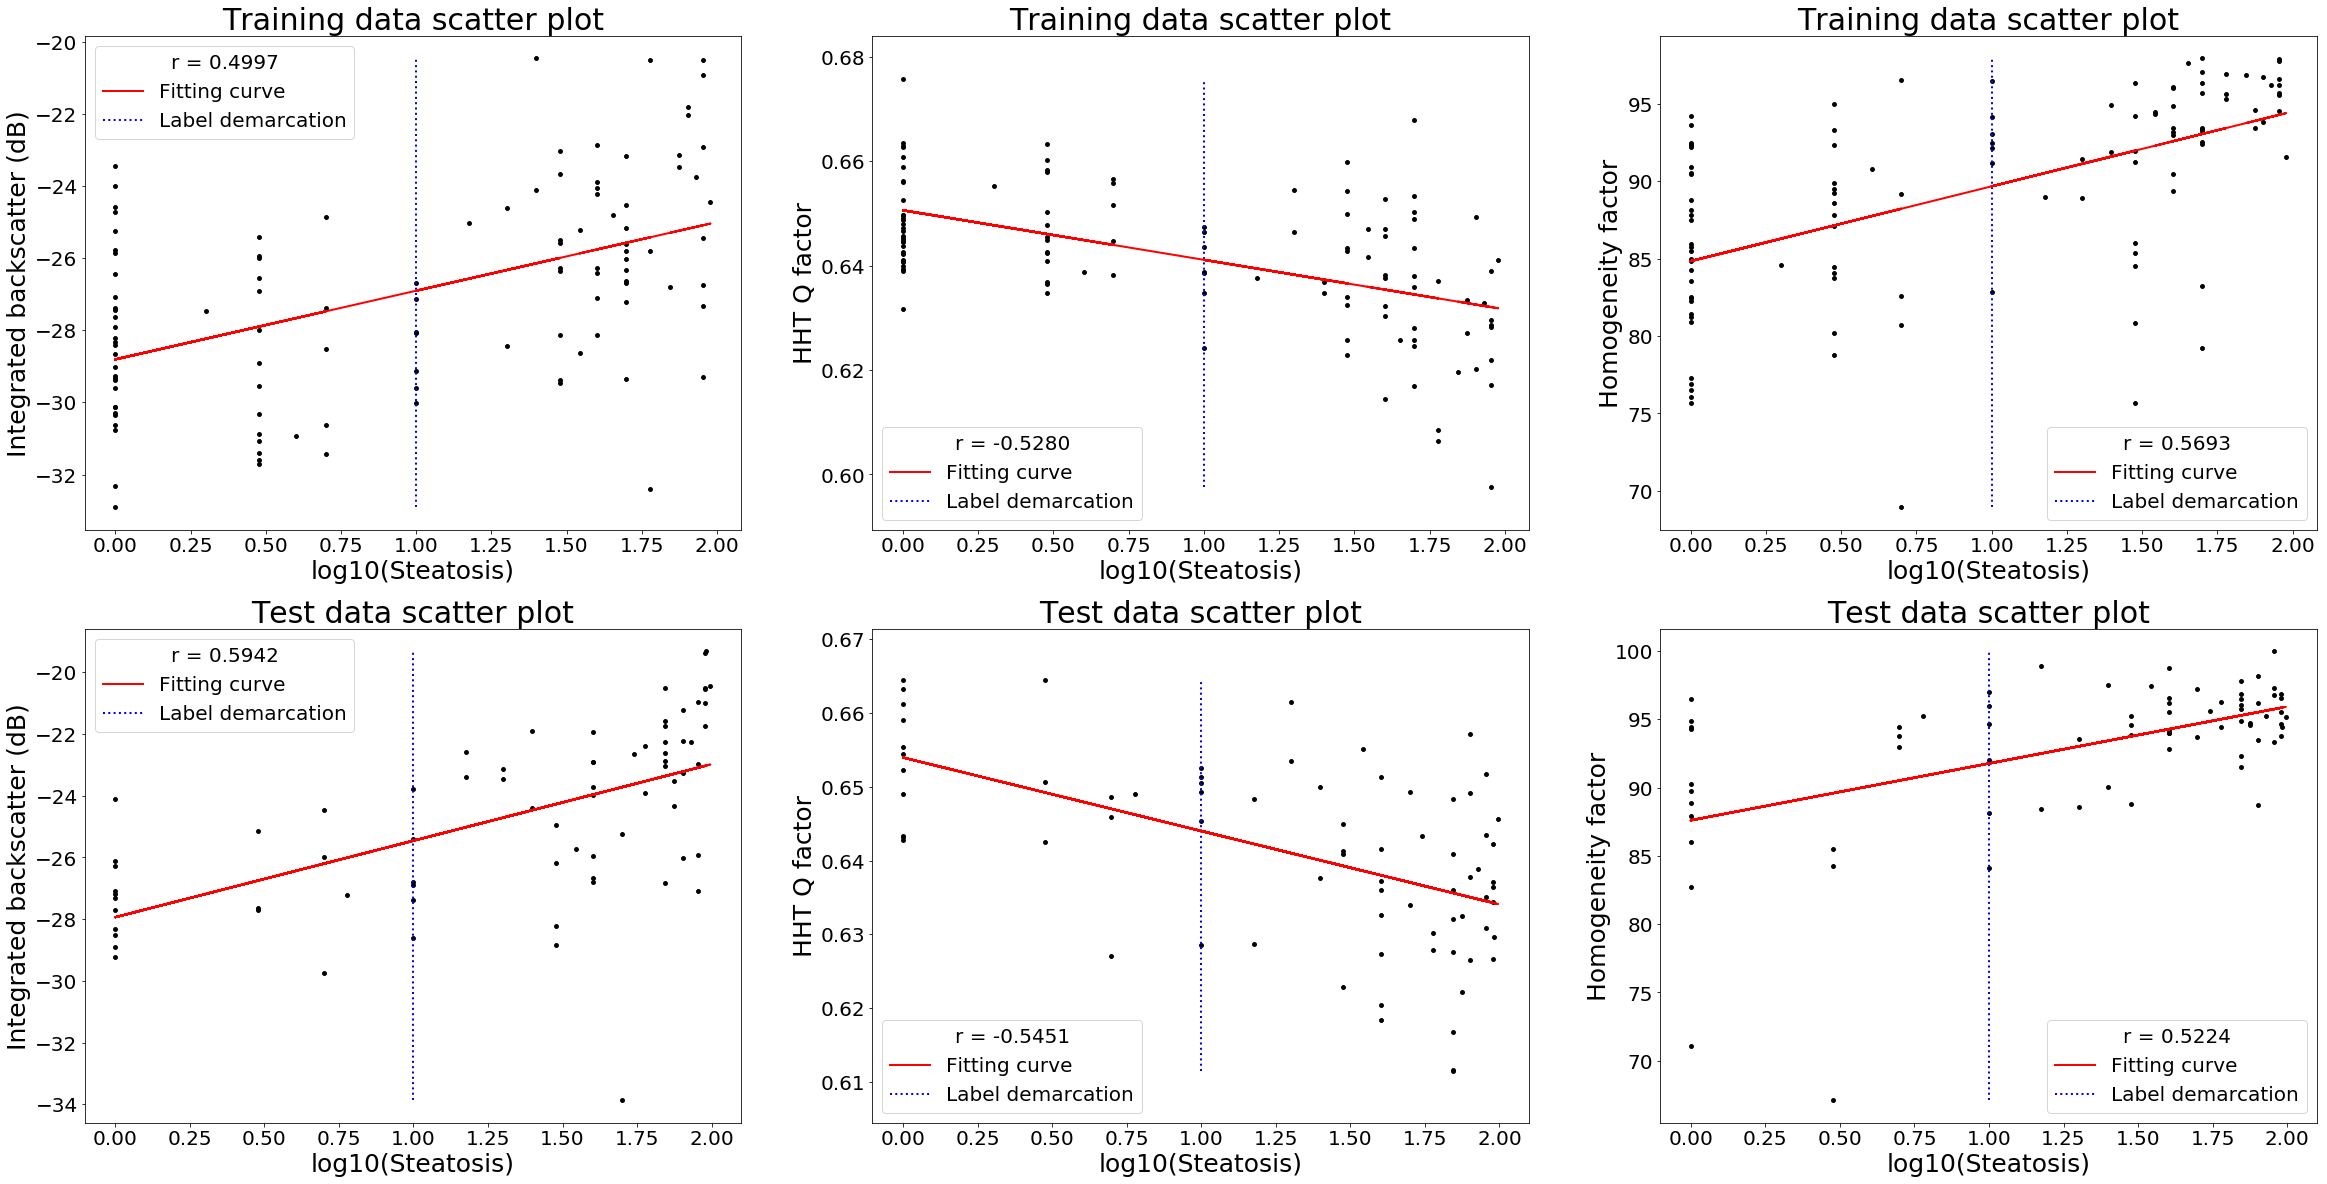

In [69]:
# Scatter & Trend-line & Correlation Coefficient plot

# import models
import matplotlib.pyplot as plt
import numpy as np
import xlrd
from sklearn.preprocessing import MinMaxScaler

# load data
## Pathology for train
data = xlrd.open_workbook("Pathology.xlsx").sheets()[0]

X_train = data.col_values(2)  # X = Pathology

y_train = np.zeros((111, 3))
y_train[:, 0] = data.col_values(3)  # y0 = Integrated backscatter
y_train[:, 1] = data.col_values(4)  # y1 = Q factor (HHT)
y_train[:, 2] = data.col_values(6)  # y2 = Homogeneity factor

## New Pathology for test
data = xlrd.open_workbook("NPathology.xlsx").sheets()[0]

X_test = data.col_values(2)   # X = NPathology

y_test = np.zeros((74, 3))
y_test[:, 0] = data.col_values(3)  # y0 = Integrated backscatter
y_test[:, 1] = data.col_values(4)  # y1 = Q factor (HHT)
y_test[:, 2] = data.col_values(6)  # y2 = Homogeneity factor

features = ['Integrated backscatter (dB)', 'HHT Q factor', 'Homogeneity factor']

# correlation coefficient
R = list(np.corrcoef(X_train, y_train[:, i])[1,0] for i in range (3))
S = list(np.corrcoef(X_test, y_test[:, i])[1,0] for i in range (3))

# plot
plt.figure(figsize = (40, 20))

for i in range(3):
    plt.subplot(2, 3, 1+i)
    plt.scatter(X_train, y_train[:, i], s = 15, c = 'black', alpha = 1)
    plt.title('Training data scatter plot', size=30)
    plt.xlabel('log10(Steatosis)', size = 25)
    plt.ylabel('{0}'.format(features[i]), size = 25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.vlines(1, min(y_train[:, i]), max(y_train[:, i]), linestyle=':', linewidth=2, color = 'blue', label = 'Label demarcation')
    
    ## calc the trendline (it is simply a linear fitting)
    z1 = np.polyfit(X_train, y_train[:, i], 1)
    p1 = np.poly1d(z1)
    plt.plot(X_train, p1(X_train), color = 'red', linestyle='-', linewidth=2, label = 'Fitting curve')
    
    plt.legend(loc = 'best', fontsize = 20, title = 'r = {0:0.4f}'.format(R[i])).get_title().set_fontsize('20')
    
    plt.subplot(2, 3, 4+i)
    plt.scatter(X_test, y_test[:, i], s = 15, c = 'black', alpha = 1)
    plt.title('Test data scatter plot', size=30)
    plt.xlabel('log10(Steatosis)', size = 25)
    plt.ylabel('{0}'.format(features[i]), size = 25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.vlines(1, min(y_test[:, i]), max(y_test[:, i]), linestyle=':', linewidth=2, color = 'blue', label = 'Label demarcation')

    ## calc the trendline (it is simply a linear fitting)
    z2 = np.polyfit(X_test, y_test[:, i], 1)
    p2 = np.poly1d(z2)
    plt.plot(X_test, p2(X_test), color = 'red', linestyle='-', linewidth=2, label = 'Fitting curve')
    
    plt.legend(loc = 'best', fontsize = 20, title = 'r = {0:0.4f}'.format(S[i])).get_title().set_fontsize('20')
    
plt.savefig('Data Visualization\log10(Steatosis) VS. features.png')
plt.show()